## Data Analysis and Visualization

Welcome to this notebook, where we delve into the visualization and analysis of our dataset. While this step is optional, engaging with it can provide you with a deeper understanding of the underlying data. Additionally, you might discover useful techniques and ideas that you can adapt for your own analyses. Let's start by setting up our environment.

### Setup: Importing Necessary Libraries

First, we'll import the libraries necessary for data manipulation and visualization:

In [32]:
# Importing data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading: Reading the Dataset

Now, let's load the dataset into a DataFrame. This allows us to manipulate and visualize the data easily:

In [33]:
# Loading the dataset from a CSV file
df = pd.read_csv('../DATASETS/netflix_reviews.csv')

### Initial Analysis: Understanding the Dataset Structure

To begin our exploration, we'll examine the basic structure of the dataset. This includes checking the number of entries, columns, and identifying any missing values.

In [34]:
# Displaying information about the DataFrame to understand its structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113610 entries, 0 to 113609
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113610 non-null  object
 1   userName              113608 non-null  object
 2   content               113608 non-null  object
 3   score                 113610 non-null  int64 
 4   thumbsUpCount         113610 non-null  int64 
 5   reviewCreatedVersion  96972 non-null   object
 6   at                    113610 non-null  object
 7   appVersion            96972 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


From the output, we see that our dataset comprises 1,113,610 rows and 8 columns, with some entries missing across various columns.

### Column Descriptions

Here's a breakdown of the columns in our dataset:
- `reviewId`: A unique identifier for each review.
- `userName`: The name of the user who submitted the review.
- `content`: The actual text of the review.
- `score`: The rating given, ranging from 1 to 5.
- `thumbsUpCount`: The number of "thumbs up" the review received.
- `reviewCreatedVersion`: The version of the app at the time the review was written (may be useful for version-specific analysis).
- `at`: The date and time the review was posted.
- `appVersion`: The app version at the time of the review, potentially useful for tracking changes in user feedback over different versions.

### Previewing the Data

Next, let's take a quick look at the first few entries in our dataset to get a feel for the data we're working with:

In [35]:
# Displaying the first five rows of the DataFrame to preview the data
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,cc1cfcd2-dc8a-4ead-88d1-7f2b2dbb2662,NR Bharadwaj,Plsssss stoppppp giving screen limit like when...,2,0,8.120.0 build 10 50712,2024-07-02 17:17:53,8.120.0 build 10 50712
1,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,NaN,2024-06-26 15:38:06,NaN
2,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,NaN,2024-06-24 15:29:54,NaN
3,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,NaN,2024-06-22 15:41:54,NaN
4,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626


## Managing Missing Data
### Identifying Missing Values

Before addressing them, let's identify where the missing values occur within our dataset:

In [36]:
# Checking for missing values in each column
missing_values = df.isna().sum()
print(missing_values)

reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16638
at                          0
appVersion              16638
dtype: int64


### Handling Missing Values

To ensure our analysis isn't skewed by missing data, we'll fill these gaps:

In [37]:
# Filling missing values with empty strings where applicable
df.fillna('', inplace=True)

## Visualization: Deep Dive into the Data
### Distribution of Ratings

We'll start by examining how users have rated the content, which can be insightful for understanding overall user satisfaction:

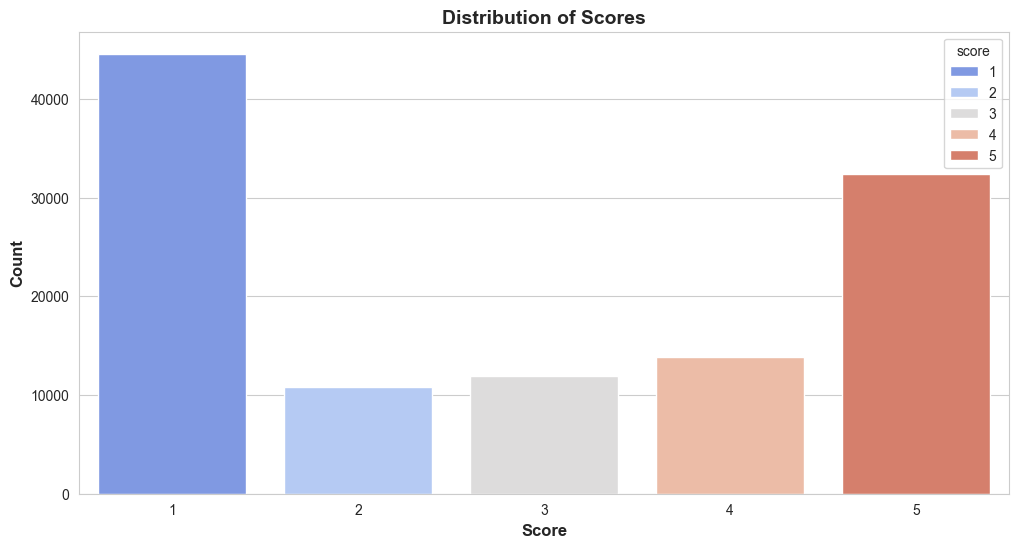

In [38]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Counting occurrences of each rating and sorting by the rating value
score_counts = df['score'].value_counts().sort_index()

# Creating a bar plot for rating distributions
plt.figure(figsize=(12, 6))
palette = sns.color_palette("coolwarm", len(score_counts))
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette=palette)
plt.xlabel('Score', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Scores', fontsize=14, fontweight='bold')
plt.show()

### Temporal Analysis of Reviews

Next, let's look at the number of reviews over time to identify any trends:

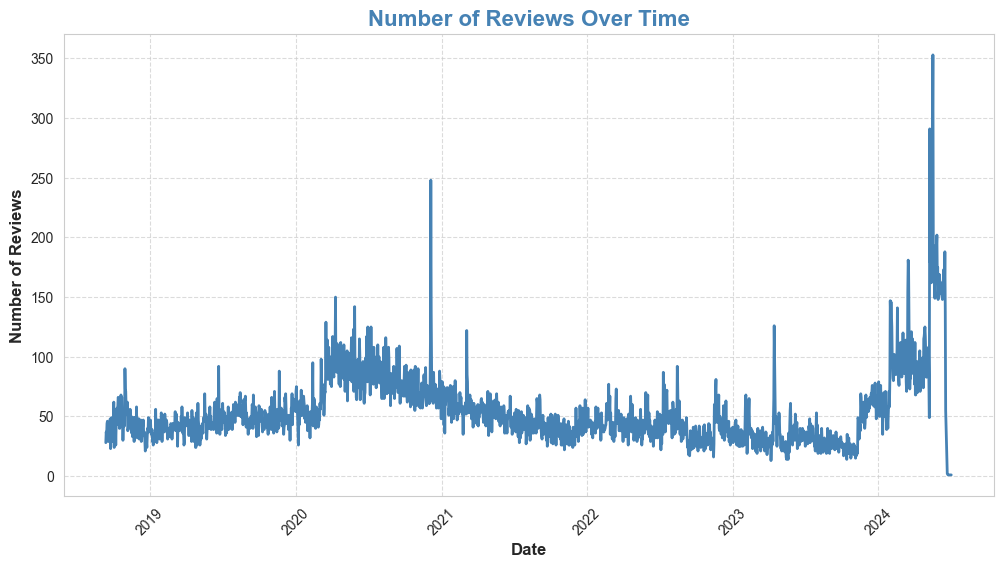

In [39]:
# Converting the 'at' column to datetime format and extracting the date
df['review_date'] = pd.to_datetime(df['at']).dt.date

# Counting reviews by date and plotting a line graph
date_counts = df['review_date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', color='steelblue', lw=2)
plt.title('Number of Reviews Over Time', fontsize=16, fontweight='bold', color='steelblue')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Review Time Range

Understanding the time range of the reviews can be important for contextual analysis:

In [40]:
# Printing the earliest and latest review dates
print("Earliest review date:", df['at'].min())
print("Latest review date:", df['at'].max())

Earliest review date: 2018-09-12 07:22:12
Latest review date: 2024-07-02 17:17:53


### Analyzing Review Length

Examining the length of reviews can offer insights into user engagement:

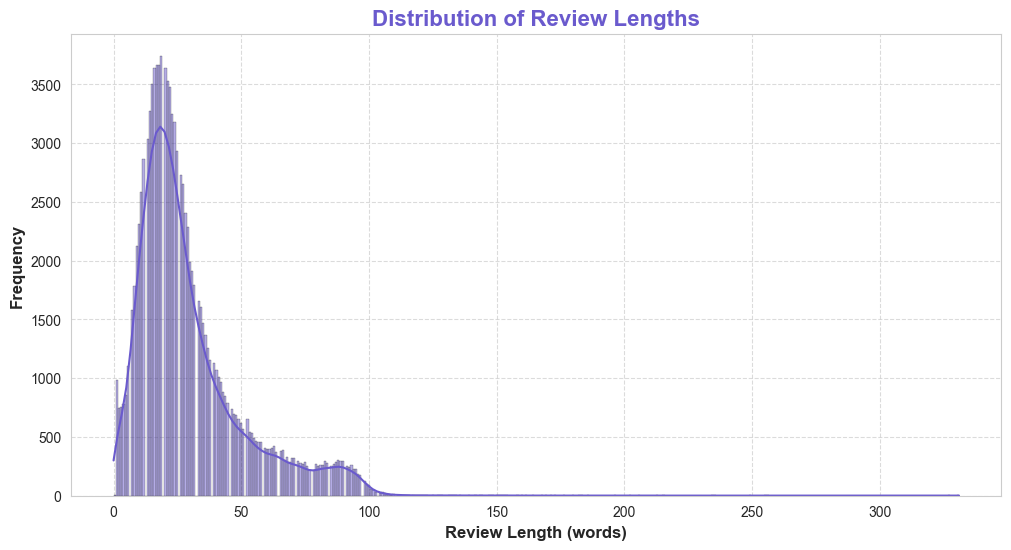

In [41]:
# Calculating the length of each review in words
df['review_length'] = df['content'].apply(lambda x: len(x.split()))

# Plotting the distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='review_length', color='slateblue', kde=True, edgecolor='black')
plt.title('Distribution of Review Lengths', fontsize=16, fontweight='bold', color='slateblue')
plt.xlabel('Review Length (words)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Yearly Review Volume

Lastly, let's analyze how the volume of reviews has changed annually:

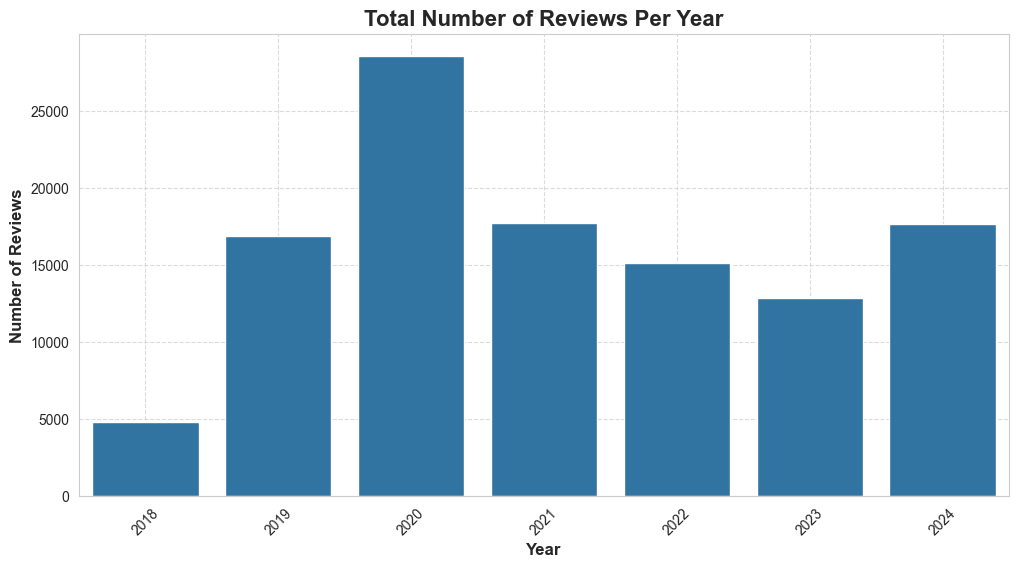

In [42]:
# Converting 'at' to datetime format (if not already done)
df['at'] = pd.to_datetime(df['at'])

# Counting reviews per year
year_counts = df['at'].dt.year.value_counts().sort_index()

# Creating a bar plot for reviews per year
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Total Number of Reviews Per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Visualizing Sentiments: Word Cloud Analysis

Word clouds are graphical representations of word frequency that provide a quick and insightful overview of textual data. In a word cloud, the size of each word indicates its frequency or importance; thus, larger and bolder words are often more common. This visualization technique is particularly useful for identifying prevalent themes or issues within different categories of data, such as customer reviews.

### Categorizing Reviews by Sentiment

Before we visualize the data, we first need to categorize the reviews into positive, neutral, and negative based on their scores. This categorization will help us analyze the sentiment trends more effectively:

In [43]:
# Function to determine sentiment based on the review score
def determine_sentiment(score):
    if score > 3:
        return 'positive'
    elif score < 3:
        return 'negative'
    else:
        return 'neutral'

# Applying the function to categorize each review
df['Sentiment'] = df['score'].apply(determine_sentiment)

### Generating Word Clouds for Each Sentiment Category

We'll now generate word clouds for each sentiment category to visualize the common words associated with each.

#### Negative Reviews Word Cloud

Let's start by visualizing the most frequent terms in negative reviews, which can highlight issues or common complaints:

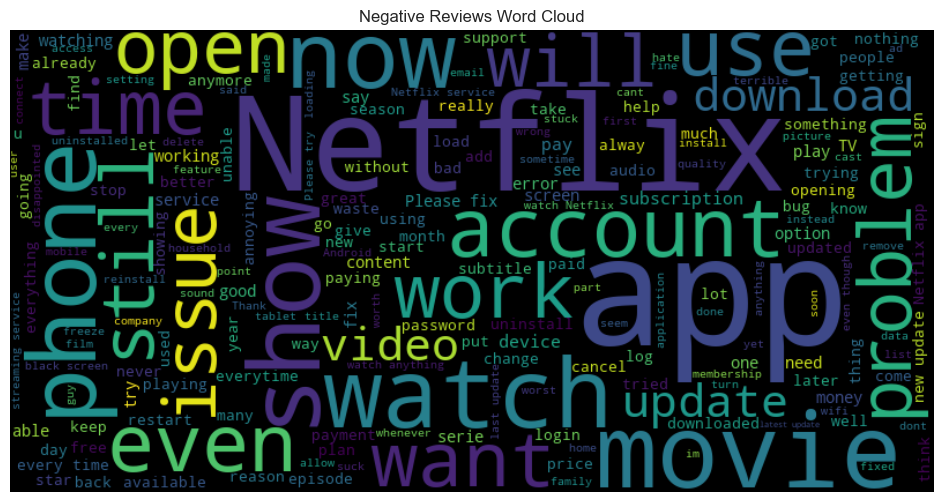

In [44]:
# Importing the WordCloud library
from wordcloud import WordCloud

# Aggregating the content of all negative reviews
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['content'])

# Generating and displaying the word cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hides the x and y axes for a cleaner display
plt.title('Negative Reviews Word Cloud')
plt.show()

#### Neutral Reviews Word Cloud

Next, we examine the neutral reviews, which might show a balance of sentiments:

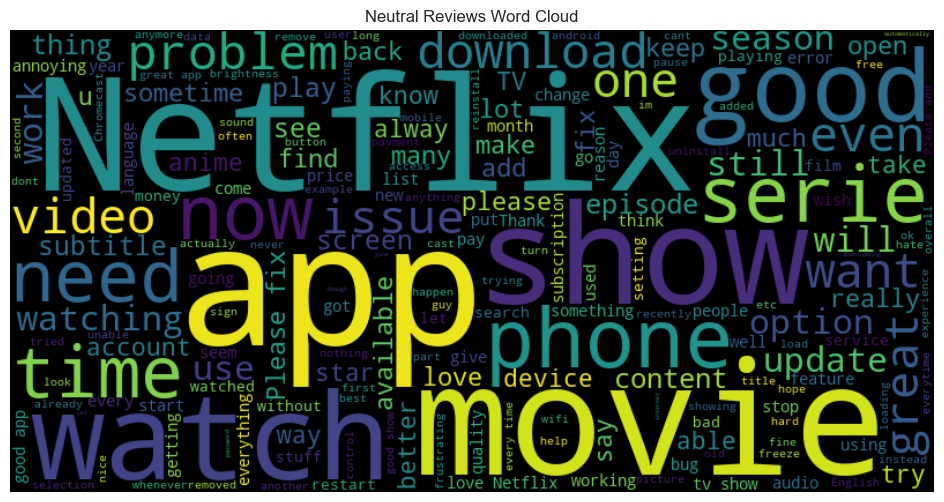

In [45]:
# Aggregating the content of all neutral reviews
neutral_reviews = ' '.join(df[df['Sentiment'] == 'neutral']['content'])

# Generating and displaying the word cloud for neutral reviews
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_reviews)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews Word Cloud')
plt.show()

#### Positive Reviews Word Cloud

Finally, let's visualize the common terms in positive reviews, often reflecting satisfaction or praise:

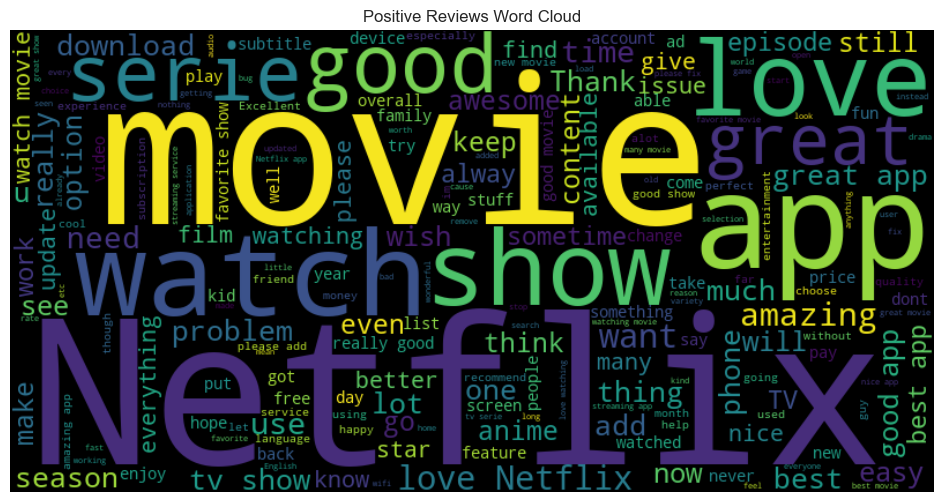

In [46]:
# Aggregating the content of all positive reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['content'])

# Generating and displaying the word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_reviews)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()